1. Run IMDB
- Experiment with one and three hidden layers
- Experiment with more or fewer hidden units - 32 units, 64 units etc.
- Investigate replacing the `binary_crossentropy` loss function with `mse`
- Experiment with replacing `relu` with `tanh` activations
- Investigate the effect of different learning rates
- Take your best network and train on all the training data for the optimal epochs. Evaluate on the test set

In [8]:
# IMDB

from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers

### One-hot encode samples 
### Convert the layers to floating point value tenses  

In [9]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#### Load Data


In [10]:

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)


#### Preprocess Data

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Build Model

#### Layers
Stack of full connected ```relu``` activated layers expected to perform well  
First Layer: ```Dense(16, activation='relu', input_shape = (10000, ))``` 
- transforms input tensor into 1D tensor of length 16 (= 16 dim vector)
- layer performs a geometric transformation resulting in a 16 dim space
- implements ```output = relu(dot(w, input) + b)```
    - weight parameters stored in 2D tensor shape ```(n,16)``` where n = length of input 1D tensor

Intermediate Layers:  
```Dense(16, activation = 'relu')```


```Dense(1, activation = 'sigmoid')```
- sigmoid outputs probability 
- 1D vector (scalar) output 

#### Loss and Optimizer
Binary classification problem => output is a *probability*  

Loss = **Binary cross-entropy**  
Optimizer = ```RMSprop``` - SGD with momentum  
Monitoring Metric = ```accuracy```

In [12]:
# build


model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


### Training and Validation  

In [13]:
# Get Validation Set (first 10,000 samples)
x_val = x_train[:10000]

# Partial Traniing Set
partial_x_train = x_train[10000:]

# Validation Set Labels
y_val = y_train[:10000]

# Training set labels
partial_y_train = y_train[10000:]


Train for 20 epochs  
Mini-batches of 512 samples  
Validation loss and accuracy monitor progress  

In [14]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 9s 263ms/step - loss: 0.5172 - accuracy: 0.7888 - val_loss: 0.3930 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3083 - accuracy: 0.8997 - val_loss: 0.3050 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2238 - accuracy: 0.9273 - val_loss: 0.2843 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 3s 100ms/step - loss: 0.1754 - accuracy: 0.9435 - val_loss: 0.2830 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1435 - accuracy: 0.9542 - val_loss: 0.3074 - val_accuracy: 0.8764
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1187 - accuracy: 0.9647 - val_loss: 0.3030 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0979 - accuracy: 0.9719 - val_loss: 0.3084 - val_accuracy: 0.8841
Epoch 8/20


```model.fit``` returns a history object as a dictionary  
Discover the keys => 4 key-value pairs for each epoch   
- valiation 
- training
- loss 
- accuracy


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Show training set losses for each epoch

In [16]:
history_dict['loss']

[0.5172075033187866,
 0.3082764744758606,
 0.22379790246486664,
 0.17537768185138702,
 0.1435053050518036,
 0.11870578676462173,
 0.09793777018785477,
 0.08124256879091263,
 0.06839421391487122,
 0.05379141494631767,
 0.043100930750370026,
 0.03509043902158737,
 0.030299903824925423,
 0.02185901068150997,
 0.016998883336782455,
 0.010954545810818672,
 0.013080541975796223,
 0.0074321432039141655,
 0.005688154604285955,
 0.00362161872908473]

Plot training and validation loss  
Training loss decreases => SGD is optimizing  
Validation loss decreases then increases => lowest at epoch 4 or 5  

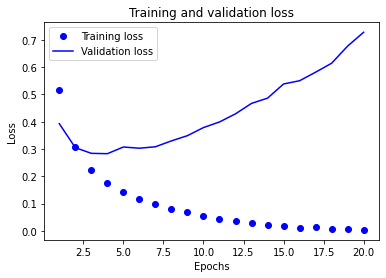

In [17]:
import matplotlib.pyplot as plt
    
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
history_dict['accuracy']

[0.7888000011444092,
 0.8996666669845581,
 0.9273333549499512,
 0.9435333609580994,
 0.954200029373169,
 0.964733362197876,
 0.9718666672706604,
 0.9769999980926514,
 0.9818666577339172,
 0.9869333505630493,
 0.9903333187103271,
 0.9929999709129333,
 0.993399977684021,
 0.9962666630744934,
 0.9972666501998901,
 0.9993333220481873,
 0.997866690158844,
 0.9995999932289124,
 0.999666690826416,
 0.9998666644096375]

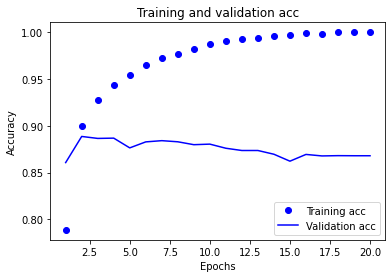

In [19]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Training Accuracy approaches 1 => this is good  
Validation accuracy peaoks early in the run => model has been overtrained  
Example of overfitting
- fits the training data to well
- begins to fail on the validation set
- should stop as overfitting kicks in (4 epochs)
- should retrain for 4 epochs and then evaluate on test set


In [20]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 4,
                    batch_size = 512,
                    ) 

results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2185 - accuracy: 0.9454
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1314 - accuracy: 0.9611
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0992 - accuracy: 0.9705
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4912 - accuracy: 0.8580


In [21]:
results

[0.49115699529647827, 0.8580399751663208]

### Accuracy is 85%
State of the art should hit 95%


## Prediction with Pretrained Network

In [22]:
model.predict(x_test[:10])

1/1 [==============================] - 1s 925ms/step


array([[3.8761612e-02],
       [1.0000000e+00],
       [8.9485723e-01],
       [7.7317560e-01],
       [9.9604541e-01],
       [9.9914122e-01],
       [9.9932140e-01],
       [6.6056673e-04],
       [9.7270828e-01],
       [1.0000000e+00]], dtype=float32)

In [23]:
test_labels[0:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
print('review','\t','prediction', '\t', '\t','label')
for i in range(20):
    y_pred = model.predict(x_test[i:i+1])[0][0]
    print(i, '\t', 'y_pred', '\t', round(y_pred), '\t', test_labels[i])

review 	 prediction 	 	 label
1/1 [==============================] - 0s 26ms/step
0 	 y_pred 	 0 	 0
1/1 [==============================] - 0s 33ms/step
1 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 21ms/step
2 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 24ms/step
3 	 y_pred 	 1 	 0
1/1 [==============================] - 0s 22ms/step
4 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 20ms/step
5 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 23ms/step
6 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 37ms/step
7 	 y_pred 	 0 	 0
1/1 [==============================] - 0s 20ms/step
8 	 y_pred 	 1 	 0
1/1 [==============================] - 0s 17ms/step
9 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 20ms/step
10 	 y_pred 	 1 	 1
1/1 [==============================] - 0s 18ms/step
11 	 y_pred 	 0 	 0
1/1 [==============================] - 0s 21ms/step
12 	 y_pred 	 0 	 0
1/1 [==============================] - 0s 19

### Further Experiments
- more or fewer hidden layers, 32 units, 64 units etc.
- replace ```binary_cross_entropy``` loss function with ```mse```
- replace ```relu``` with an early NN favourite, ```tanh```
- try different learning rates 